In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib
import seaborn as sns

print("sklearn versão:", sk.__version__)
print("numpy versão:", np.__version__)
print("pandas versão:", pd.__version__)
print("matplotlib versão:", matplotlib.__version__)

sklearn versão: 0.23.2
numpy versão: 1.16.2
pandas versão: 1.0.5
matplotlib versão: 3.0.3


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df_original = pd.read_csv("CaDa_NaoLigamosParaAG_FullData.csv")
df = df_original.copy()

In [4]:
# boolean (true,false) to (1,0)

bool_col = ['gesticula_negociante', 'automatico_primeiro_carro', 'flex_primeiro_carro', 
 'automatico_segundo_carro', 'flex_segundo_carro',
 'automatico_carro_comprado', 'flex_carro_comprado', 'tem_criancas']

for col in bool_col:
    df[col] = df.apply(lambda x: float(x[col]), axis=1)

In [5]:
# criando flag se o cliente olhou 2 carros

df['olhou_segundo'] = df.apply(lambda x: int(x.notna()['valor_segundo_carro']), axis=1)

# criando flag se o cliente comprou ou não naquela visita

df['comprou'] = df.apply(lambda x: int(x.notna()['valor_carro_comprado']), axis=1)

In [6]:
ordinal_col = ['idade_negociante', 'vestimenta_negociante']
ordinal_dic = [{'[18, 25)': 0, '[25, 40)': 1, '[40, 100)': 2}, 
               {'Mal-arrumado': 0, 'Normal': 1, 'Bem-arrumado': 2}]

for i, col in enumerate(ordinal_col):
    df[col] = df.apply(lambda x: ordinal_dic[i][(x[col])], axis=1)

In [7]:
indices_comprou = df[~df['valor_carro_comprado'].isna()].index
indices_primeiro = df.query("valor_primeiro_carro == valor_carro_comprado and ano_primeiro_carro == ano_carro_comprado and cor_primeiro_carro == cor_carro_comprado and tipo_primeiro_carro == tipo_carro_comprado and km_primeiro_carro == km_carro_comprado and automatico_primeiro_carro == automatico_carro_comprado and flex_primeiro_carro == flex_carro_comprado and marca_primeiro_carro == marca_carro_comprado").index
indices_segundo = df.query("valor_segundo_carro == valor_carro_comprado and ano_segundo_carro == ano_carro_comprado and cor_segundo_carro == cor_carro_comprado and tipo_segundo_carro == tipo_carro_comprado and km_segundo_carro == km_carro_comprado and automatico_segundo_carro == automatico_carro_comprado and flex_segundo_carro == flex_carro_comprado and marca_segundo_carro == marca_carro_comprado").index

In [8]:
df.loc[indices_comprou, 'comprou_qual_carro'] = 3
df.loc[indices_primeiro, 'comprou_qual_carro'] = 1
df.loc[indices_segundo, 'comprou_qual_carro'] = 2

In [9]:
variaveis_cliente = ['loja', 'vestimenta_negociante', 'idade_negociante', 'tem_criancas',
                    'cor_cabelo_negociante', 'sexo_negociante', 'gesticula_negociante',
                    'periodo_visita'] # tiramos o nro_pessoas

In [10]:
primeiro_carro = ['valor_primeiro_carro', 'ano_primeiro_carro', 'cor_primeiro_carro',
                  'tipo_primeiro_carro', 'km_primeiro_carro', 'automatico_primeiro_carro',
                  'flex_primeiro_carro', 'marca_primeiro_carro' ]

segundo_carro = ['valor_segundo_carro', 'ano_segundo_carro', 'cor_segundo_carro',
                  'tipo_segundo_carro', 'km_segundo_carro', 'automatico_segundo_carro',
                  'flex_segundo_carro', 'marca_segundo_carro' ] 

comprado_carro = ['valor_carro_comprado', 'ano_carro_comprado', 'cor_carro_comprado',
                  'tipo_carro_comprado', 'km_carro_comprado', 'automatico_carro_comprado',
                  'flex_carro_comprado', 'marca_carro_comprado' ]

colunas_carro = ['valor', 'ano', 'cor', 'tipo', 'km', 'automatico', 'flex', 'marca']

In [11]:
df_linhas = pd.concat( [(df.query('comprou_qual_carro == 1')[primeiro_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(primeiro_carro,colunas_carro)})]
                      + [(df.query('comprou_qual_carro == 2')[primeiro_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(primeiro_carro,colunas_carro)})]
                      + [(df.query('comprou_qual_carro == 2')[segundo_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(segundo_carro,colunas_carro)})]
                      + [(df.query('comprou_qual_carro == 3')[primeiro_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(primeiro_carro,colunas_carro)})]
                      + [(df.query('comprou_qual_carro == 3')[segundo_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(segundo_carro,colunas_carro)})]
                      + [(df.query('comprou_qual_carro == 3')[comprado_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(comprado_carro,colunas_carro)})]
                      + [(df.query('olhou_segundo == 0 and comprou == 0')[primeiro_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(primeiro_carro,colunas_carro)})] 
                      + [(df.query('olhou_segundo == 1 and comprou == 0')[primeiro_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(primeiro_carro,colunas_carro)})]
                      + [(df.query('olhou_segundo == 1 and comprou == 0')[segundo_carro+variaveis_cliente]).rename(columns = {antigo:novo for antigo, novo in zip(segundo_carro,colunas_carro)})])

df_linhas['y'] = [1]*df.query('comprou_qual_carro == 1').shape[0]+[0]*df.query('comprou_qual_carro == 2').shape[0]+[1]*df.query('comprou_qual_carro == 2').shape[0]+[0]*df.query('comprou_qual_carro == 3').shape[0]+[0]*df.query('comprou_qual_carro == 3').shape[0]+[1]*df.query('comprou_qual_carro == 3').shape[0]+[0]*df.query('olhou_segundo == 0 and comprou == 0').shape[0]+[0]*df.query('olhou_segundo == 1 and comprou == 0').shape[0]+[0]*df.query('olhou_segundo == 1 and comprou == 0').shape[0]
df_linhas.sort_index(inplace=True)

# Cada linha 1 carro, o cliente e se ele foi vendido ou não naquela visita :)

In [12]:
print(df_linhas.head().to_markdown())

|    |    valor |   ano | cor      | tipo   |   km |   automatico |   flex | marca      |   loja |   vestimenta_negociante |   idade_negociante |   tem_criancas | cor_cabelo_negociante   | sexo_negociante   |   gesticula_negociante | periodo_visita   |   y |
|---:|---------:|------:|:---------|:-------|-----:|-------------:|-------:|:-----------|-------:|------------------------:|-------------------:|---------------:|:------------------------|:------------------|-----------------------:|:-----------------|----:|
|  0 | 101040   |  2006 | Branco   | SUV    |  117 |            0 |      0 | Ford       |      3 |                       2 |                  1 |              0 | Ruivo                   | M                 |                      0 | Vespertino       |   0 |
|  0 |  47603.5 |  2016 | Vermelho | Hatch  |  140 |            1 |      1 | Renault    |      3 |                       2 |                  1 |              0 | Ruivo                   | M                 |               

In [13]:
df_linhas.reset_index(drop=True, inplace=True)

In [14]:
nominais_col = ['cor', 'marca', 'tipo']
df_final = df_linhas.merge(pd.get_dummies(df_linhas[nominais_col]),left_index=True, right_index=True).drop(columns=nominais_col)

# Modelo classificação

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_roc_curve, precision_score, f1_score, fbeta_score, accuracy_score, recall_score, confusion_matrix, roc_auc_score

In [16]:
vars_ordenadas = ['valor', 'ano', 'km', 'automatico', 'flex', 'cor_Azul', 'cor_Branco',
                  'cor_Preto', 'cor_Vermelho', 'marca_Fiat', 'marca_Ford',
                  'marca_Peugeot', 'marca_Renault', 'marca_Volkswagen', 'tipo_Hatch',
                  'tipo_SUV', 'tipo_Sedan',
                  'tem_criancas',  'vestimenta_negociante','idade_negociante', 'loja',]

In [17]:
X = df_final[vars_ordenadas]
y = df_final['y']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
X.shape

(17594, 21)

In [19]:
y.mean()

0.14772081391383426

In [20]:
param = {'max_depth': np.arange(3,50,10),
        'min_samples_leaf': np.arange(10,300,80),
         'n_estimators': np.arange(100,400,100)
        }
param

{'max_depth': array([ 3, 13, 23, 33, 43]),
 'min_samples_leaf': array([ 10,  90, 170, 250]),
 'n_estimators': array([100, 200, 300])}

In [21]:
grid_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, scoring='roc_auc', cv= 5)

In [22]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3, 13, 23, 33, 43]),
                         'min_samples_leaf': array([ 10,  90, 170, 250]),
                         'n_estimators': array([100, 200, 300])},
             scoring='roc_auc')

In [23]:
rfc = RandomForestClassifier(**grid_cv.best_params_, class_weight='balanced_subsample')
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=13,
                       min_samples_leaf=250)

In [24]:
print(accuracy_score(y_test, rfc.predict(X_test)))
print(f1_score(y_test, rfc.predict(X_test)))
print(recall_score(y_test, rfc.predict(X_test)))
print(precision_score(y_test,rfc.predict(X_test)))
print(roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

0.753353034780632
0.43282801881860955
0.6428571428571429
0.3262411347517731
0.7766028318349861


In [25]:
confusion_matrix(y_test,rfc.predict(X_test))

array([[2900,  855],
       [ 230,  414]], dtype=int64)

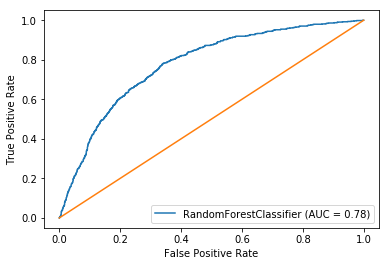

In [26]:
plot_roc_curve(rfc, X_test, y_test) 
plt.plot([0,1],[0,1])
plt.savefig("roc_auc.jpeg", bbox_inches='tight')
plt.show()

# Utilizando o modelo no dia a dia

Loja tal tem alguns carros no estoque. para ilustrar, vamos pegar 8 carros amostrados da nossa base de carros:

In [27]:
producao = X.query("loja==2").sample(4).drop(columns=['loja', 'tem_criancas',  'vestimenta_negociante', 'idade_negociante']).reset_index(drop=True)
producao

,valor,ano,km,automatico,flex,cor_Azul,cor_Branco,cor_Preto,cor_Vermelho,marca_Fiat,marca_Ford,marca_Peugeot,marca_Renault,marca_Volkswagen,tipo_Hatch,tipo_SUV,tipo_Sedan
0,88072.0,2011.0,63.0,1.0,0.0,0,1,0,0,0,0,0,0,1,1,0,0
1,45225.0,2014.0,81.0,0.0,1.0,0,0,1,0,1,0,0,0,0,1,0,0
2,44104.5,2005.0,163.0,1.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0
3,102060.0,2014.0,61.0,0.0,1.0,0,1,0,0,0,0,1,0,0,0,1,0


Chega um cliente em alguma das lojas. Ele tem alguns atributos que vimos anteriormente serem relevantes.

In [28]:
producao['loja'] = 2
producao['tem_criancas'] = 1
producao['vestimenta_negociante'] = 1
producao['idade_negociante'] = 2

Indice do carro que devemos oferecer para maximizar o *lucro esperado*

In [29]:
np.argmax(((rfc.predict_proba(producao)[:,1]))*np.log2(producao['valor']))

2

Algumas métricas para analisar.

In [30]:
pd.DataFrame({'probabilidade': (rfc.predict_proba(producao)[:,1]), 'valor': producao.valor , 'score': (rfc.predict_proba(producao)[:,1])*np.log2(producao['valor'])}).sort_values(by='score', ascending=False)

,probabilidade,valor,score
2,0.471202,44104.5,7.270006
3,0.431523,102060.0,7.180142
1,0.432469,45225.0,6.688067
0,0.404278,88072.0,6.640830


In [31]:
producao.iloc[np.argmax(((rfc.predict_proba(producao)[:,1]))*np.log2(producao['valor']))]

valor                    44104.5
ano                       2005.0
km                         163.0
automatico                   1.0
flex                         1.0
cor_Azul                     0.0
cor_Branco                   0.0
cor_Preto                    1.0
cor_Vermelho                 0.0
marca_Fiat                   0.0
marca_Ford                   0.0
marca_Peugeot                0.0
marca_Renault                1.0
marca_Volkswagen             0.0
tipo_Hatch                   0.0
tipo_SUV                     1.0
tipo_Sedan                   0.0
loja                         2.0
tem_criancas                 1.0
vestimenta_negociante        1.0
idade_negociante             2.0
Name: 2, dtype: float64

Como segunda opção damos o carro com maior probabilidade de ele comprar (excluindo o carro anterior):

In [32]:
np.argmax(((rfc.predict_proba(producao.append(producao.iloc[np.argmax(((rfc.predict_proba(producao)[:,1]))*np.log2(producao['valor']))]).drop_duplicates(keep=False))[:,1]))*(producao.append(producao.iloc[np.argmax(((rfc.predict_proba(producao)[:,1]))*np.log2(producao['valor']))]).drop_duplicates(keep=False)['valor']))

2

In [33]:
producao.iloc[np.argmax(((rfc.predict_proba(producao.append(producao.iloc[np.argmax(((rfc.predict_proba(producao)[:,1]))*np.log2(producao['valor']))]).drop_duplicates(keep=False))[:,1]))*(producao.append(producao.iloc[np.argmax(((rfc.predict_proba(producao)[:,1]))*np.log2(producao['valor']))]).drop_duplicates(keep=False)['valor']))]

valor                    44104.5
ano                       2005.0
km                         163.0
automatico                   1.0
flex                         1.0
cor_Azul                     0.0
cor_Branco                   0.0
cor_Preto                    1.0
cor_Vermelho                 0.0
marca_Fiat                   0.0
marca_Ford                   0.0
marca_Peugeot                0.0
marca_Renault                1.0
marca_Volkswagen             0.0
tipo_Hatch                   0.0
tipo_SUV                     1.0
tipo_Sedan                   0.0
loja                         2.0
tem_criancas                 1.0
vestimenta_negociante        1.0
idade_negociante             2.0
Name: 2, dtype: float64

# teste de sanidade

In [38]:
prob_igual = 0
valor_igual = 0
tudo_igual = 0

for i in range(1000):
    loja = np.random.randint(1,5)
    producao = X.query("loja==@loja").sample(20).drop(columns=['loja', 'tem_criancas',  'vestimenta_negociante', 'idade_negociante']).reset_index(drop=True)
    producao['loja'] = loja
    producao['tem_criancas'] = np.random.randint(0,2)
    producao['vestimenta_negociante'] = np.random.randint(0,3)
    producao['idade_negociante'] = np.random.randint(0,3)

    indice = np.argmax(((rfc.predict_proba(producao)[:,1]))*np.log2(producao['valor']))
    indice_prob = np.argmax(((rfc.predict_proba(producao)[:,1])))
    indice_valor = np.argmax(producao['valor'])

    if indice == indice_prob and indice != indice_valor:
        prob_igual+=1
        
    if indice != indice_prob and indice == indice_valor:
        valor_igual+=1
        
    if indice == indice_prob and indice == indice_valor:
        tudo_igual+=1

In [39]:
prob_igual

454

In [40]:
valor_igual

138

In [41]:
tudo_igual

156

In [42]:
1000 - prob_igual - valor_igual - tudo_igual

252